In [1]:
# http://rasbt.github.io/mlxtend/
!pip install mlxtend

In [2]:
#from google.colab import auth
import os
import pandas as pd

#new
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.02f}'.format

<H1> Prepare Data </H1>

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Automated_Tools-/main/BreadBasket_DMS.csv')
print(df.head(10))

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


<H1> Check missing data

In [4]:
missing = df.isnull().sum()
print(missing)

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


<H1>List unique items sold

In [5]:
print(len(df.Item.unique()))
print(df.Item.unique())

95
['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwi

<H1> Cleansing NONE items

In [6]:
print(df.loc[df["Item"]=='NONE'].shape[0]) #before clean
df = df[df["Item"] != 'NONE'] #clean
print(df.loc[df["Item"]=='NONE'].shape[0]) #after clean

786
0


<H1> Plot top 10 products

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64
 Item_array  [0 1 2 3 4 5 6 7 8 9]
 Items_name  ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']


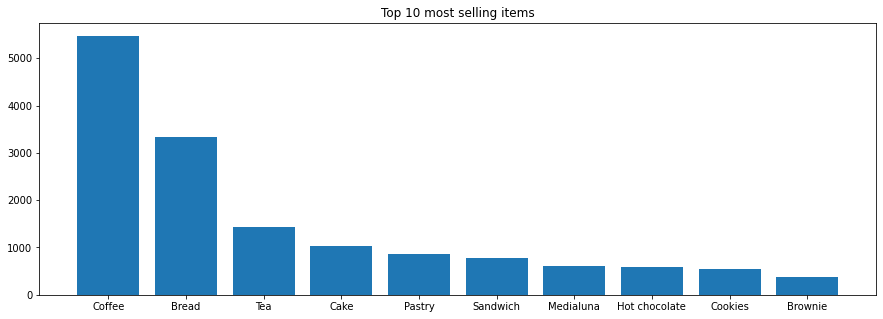

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

df_for_top10_Items = df['Item'].value_counts().head(10)
print(df_for_top10_Items)

Item_array= np.arange(len(df_for_top10_Items))
print(" Item_array ",Item_array)

plt.figure(figsize=(15,5))
Items_name= df_for_top10_Items.index.values.tolist()
print(" Items_name ", Items_name)

plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()

<H1> Prepare data for Apriori using one-hot encoding

In [8]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count()
print(hot_encoded_df.head(10))

Transaction  Item         
1            Bread            1
2            Scandinavian     2
3            Cookies          1
             Hot chocolate    1
             Jam              1
4            Muffin           1
5            Bread            1
             Coffee           1
             Pastry           1
6            Medialuna        1
Name: Item, dtype: int64


In [9]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

In [10]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack()
print(hot_encoded_df.head(10))

Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  Bowl Nic Pitt  Bread  Bread Pudding  Brioche and salami  Brownie  ...  Spanish Brunch  Spread  Tacos/Fajita  Tartine  Tea  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge
Transaction                                                                                                                                                                                                 ...                                                                                                                                                                           
1                   nan                       nan        nan              nan       nan    nan       nan       nan           nan     nan            nan   1.00            nan                 nan      nan  ...             nan     nan           

In [11]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index()
print(hot_encoded_df.head(10))

Item  Transaction  Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  Bowl Nic Pitt  Bread  Bread Pudding  Brioche and salami  ...  Spanish Brunch  Spread  Tacos/Fajita  Tartine  Tea  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge
0               1         nan                       nan        nan              nan       nan    nan       nan       nan           nan     nan            nan   1.00            nan                 nan  ...             nan     nan           nan      nan  nan       nan        nan     nan    nan       nan     nan               nan          nan             nan               nan
1               2         nan                       nan        nan              nan       nan    nan       nan       nan           nan     nan            nan    nan            nan                 nan  ...             nan     nan           nan      

In [12]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0)
print(hot_encoded_df.head(10))

Item  Transaction  Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  Bowl Nic Pitt  Bread  Bread Pudding  Brioche and salami  ...  Spanish Brunch  Spread  Tacos/Fajita  Tartine  Tea  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge
0               1        0.00                      0.00       0.00             0.00      0.00   0.00      0.00      0.00          0.00    0.00           0.00   1.00           0.00                0.00  ...            0.00    0.00          0.00     0.00 0.00      0.00       0.00    0.00   0.00      0.00    0.00              0.00         0.00            0.00              0.00
1               2        0.00                      0.00       0.00             0.00      0.00   0.00      0.00      0.00          0.00    0.00           0.00   0.00           0.00                0.00  ...            0.00    0.00          0.00     0

In [13]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
print(hot_encoded_df.head(10))

Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  Bowl Nic Pitt  Bread  Bread Pudding  Brioche and salami  Brownie  ...  Spanish Brunch  Spread  Tacos/Fajita  Tartine  Tea  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge
Transaction                                                                                                                                                                                                 ...                                                                                                                                                                           
1                  0.00                      0.00       0.00             0.00      0.00   0.00      0.00      0.00          0.00    0.00           0.00   1.00           0.00                0.00     0.00  ...            0.00    0.00          0

In [14]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

<H1> Transform data

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)
print(hot_encoded_df.head(10))

Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  Bowl Nic Pitt  Bread  Bread Pudding  Brioche and salami  Brownie  ...  Spanish Brunch  Spread  Tacos/Fajita  Tartine  Tea  The BART  The Nomad  Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  Vegan mincepie  Victorian Sponge
Transaction                                                                                                                                                                                                 ...                                                                                                                                                                           
1                     0                         0          0                0         0      0         0         0             0       0              0      1              0                   0        0  ...               0       0           

<H1> Determine product association using apriori

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Get frequent itemsets from a one-hot DataFrame Parameters
# The support is computed as the fraction
# transactions_where_item(s)_occur / total_transactions.
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

    support                 itemsets
0      0.04              (Alfajores)
1      0.02               (Baguette)
2      0.33                  (Bread)
3      0.04                (Brownie)
4      0.10                   (Cake)
..      ...                      ...
56     0.02          (Toast, Coffee)
57     0.01          (Sandwich, Tea)
58     0.01    (Cake, Bread, Coffee)
59     0.01  (Pastry, Bread, Coffee)
60     0.01      (Cake, Tea, Coffee)

[61 rows x 2 columns]


<H1>List out rules

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [17]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules.sort_values("confidence", ascending = False, inplace = True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Toast),(Coffee),0.03,0.48,0.02,0.70,1.47,0.01,1.76
13,(Spanish Brunch),(Coffee),0.02,0.48,0.01,0.60,1.25,0.00,1.30
7,(Medialuna),(Coffee),0.06,0.48,0.04,0.57,1.19,0.01,1.21
9,(Pastry),(Coffee),0.09,0.48,0.05,0.55,1.15,0.01,1.16
0,(Alfajores),(Coffee),0.04,0.48,0.02,0.54,1.13,0.00,1.14
...,...,...,...,...,...,...,...,...,...
16,"(Cake, Bread)",(Coffee),0.02,0.48,0.01,0.43,0.90,-0.00,0.91
18,"(Cake, Tea)",(Coffee),0.02,0.48,0.01,0.42,0.88,-0.00,0.90
17,"(Pastry, Bread)",(Coffee),0.03,0.48,0.01,0.38,0.80,-0.00,0.85
14,(Tea),(Coffee),0.14,0.48,0.05,0.35,0.73,-0.02,0.80


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.sort_values("lift", ascending = False, inplace = True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(Cake),"(Tea, Coffee)",0.10,0.05,0.01,0.10,1.94,0.00,1.05
70,"(Tea, Coffee)",(Cake),0.05,0.10,0.01,0.20,1.94,0.00,1.12
27,(Cake),(Hot chocolate),0.10,0.06,0.01,0.11,1.88,0.01,1.06
26,(Hot chocolate),(Cake),0.06,0.10,0.01,0.20,1.88,0.01,1.11
29,(Tea),(Cake),0.14,0.10,0.02,0.17,1.60,0.01,1.08
...,...,...,...,...,...,...,...,...,...
48,(Spanish Brunch),(Coffee),0.02,0.48,0.01,0.60,1.25,0.00,1.30
37,(Coffee),(Medialuna),0.48,0.06,0.04,0.07,1.19,0.01,1.01
36,(Medialuna),(Coffee),0.06,0.48,0.04,0.57,1.19,0.01,1.21
40,(Pastry),(Coffee),0.09,0.48,0.05,0.55,1.15,0.01,1.16


<H1>Filter rules

In [19]:
rules[ (rules['lift'] > 1) &
       (rules['confidence'] > 0.5) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,(Toast),(Coffee),0.03,0.48,0.02,0.70,1.47,0.01,1.76
48,(Spanish Brunch),(Coffee),0.02,0.48,0.01,0.60,1.25,0.00,1.30
36,(Medialuna),(Coffee),0.06,0.48,0.04,0.57,1.19,0.01,1.21
40,(Pastry),(Coffee),0.09,0.48,0.05,0.55,1.15,0.01,1.16
2,(Alfajores),(Coffee),0.04,0.48,0.02,0.54,1.13,0.00,1.14
...,...,...,...,...,...,...,...,...,...
42,(Sandwich),(Coffee),0.07,0.48,0.04,0.53,1.11,0.00,1.12
24,(Cake),(Coffee),0.10,0.48,0.05,0.53,1.10,0.01,1.10
44,(Scone),(Coffee),0.03,0.48,0.02,0.52,1.09,0.00,1.09
30,(Cookies),(Coffee),0.05,0.48,0.03,0.52,1.08,0.00,1.08


<H1> Visualize rules

In [20]:
!sudo apt-get install graphviz graphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [21]:
!pip install pygraphviz

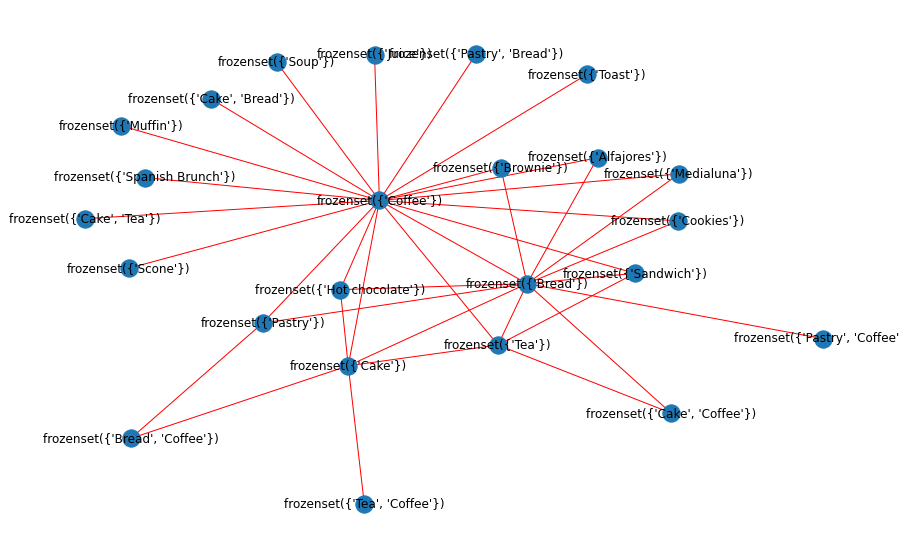

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots(figsize=(16,10))

G = nx.from_pandas_edgelist(rules, source='antecedents',target='consequents')   
pos=nx.nx_agraph.graphviz_layout(G)

nx.draw(G,pos, with_labels=True, edge_color = 'r') 
plt.show()


<H1> Prepare data

In [23]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)
print(item_item_matrix)

Item                     Adjustment Afternoon with the baker Alfajores Argentina Night Art Tray Bacon Baguette Bakewell Bare Popcorn Basket Bowl Nic Pitt Bread Bread Pudding Brioche and salami Brownie  ... Spanish Brunch Spread Tacos/Fajita Tartine  Tea The BART The Nomad Tiffin Toast Truffles Tshirt Valentine's card Vegan Feast Vegan mincepie Victorian Sponge
Item                                                                                                                                                                                                      ...                                                                                                                                                             
Adjustment                      NaN                      NaN       NaN             NaN      NaN   NaN      NaN      NaN          NaN    NaN           NaN   NaN           NaN                NaN     NaN  ...            NaN    NaN          NaN     NaN  NaN      NaN       NaN  

In [24]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      x = hot_encoded_df.iloc[:,i]
      y = hot_encoded_df.iloc[:,j]
      item_item_matrix.iloc[i,j] = 1 - cosine(x,y)
      

print(item_item_matrix)

Item                     Adjustment Afternoon with the baker Alfajores Argentina Night Art Tray Bacon Baguette Bakewell Bare Popcorn Basket Bowl Nic Pitt Bread Bread Pudding Brioche and salami Brownie  ... Spanish Brunch Spread Tacos/Fajita Tartine  Tea The BART The Nomad Tiffin Toast Truffles Tshirt Valentine's card Vegan Feast Vegan mincepie Victorian Sponge
Item                                                                                                                                                                                                      ...                                                                                                                                                             
Adjustment                     1.00                     0.00      0.00            0.00     0.00  0.00     0.00     0.00         0.00   0.00          0.00  0.00          0.00               0.00    0.00  ...           0.00   0.00         0.00    0.00 0.00     0.00      0.00  

In [25]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
print(links)
links.columns = ['item', 'related item','value']
print(links)

                  Item              related item    0
0           Adjustment                Adjustment 1.00
1           Adjustment  Afternoon with the baker 0.00
2           Adjustment                 Alfajores 0.00
3           Adjustment           Argentina Night 0.00
4           Adjustment                  Art Tray 0.00
...                ...                       ...  ...
8831  Victorian Sponge                    Tshirt 0.00
8832  Victorian Sponge          Valentine's card 0.00
8833  Victorian Sponge               Vegan Feast 0.00
8834  Victorian Sponge            Vegan mincepie 0.00
8835  Victorian Sponge          Victorian Sponge 1.00

[8836 rows x 3 columns]
                  item              related item value
0           Adjustment                Adjustment  1.00
1           Adjustment  Afternoon with the baker  0.00
2           Adjustment                 Alfajores  0.00
3           Adjustment           Argentina Night  0.00
4           Adjustment                  Art Tray  0.

In [26]:
links_filtered=links.loc[ (links['value'] > 0.15) & (links['item'] != links['related item']) ]
print(links_filtered)

              item    related item value
381       Art Tray           Bacon  0.16
420       Art Tray  Hack the stack  0.23
474          Bacon        Art Tray  0.16
816   Bare Popcorn        Panatone  0.20
1057         Bread          Coffee  0.23
...            ...             ...   ...
6885      Sandwich          Coffee  0.21
7817           Tea            Cake  0.20
7825           Tea          Coffee  0.19
8201         Toast          Coffee  0.19
8435        Tshirt        Postcard  0.41

[42 rows x 3 columns]


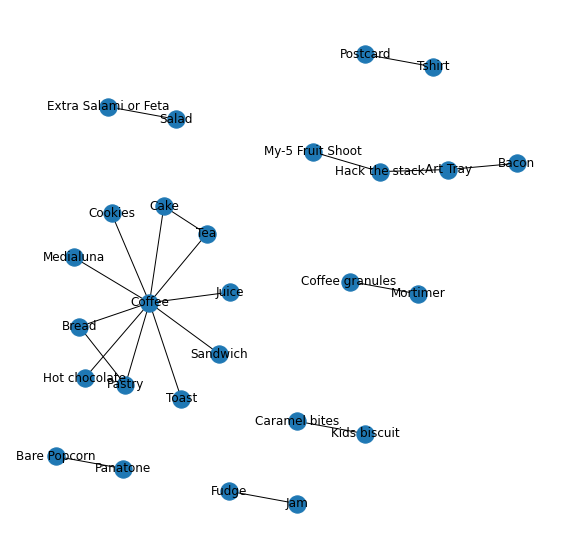

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,10))
G = nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
pos=nx.nx_agraph.graphviz_layout(G)
nx.draw(G,pos,with_labels=True)
plt.show()